## Gold Price Analysis Over the Past 5 Years

This project aims to analyze gold price trends, volatility, and potential predictive factors based on historical data from the past five years. By examining the daily price metrics, including opening, closing, high, and low values, as well as trading volume, dividends, and related financial indicators, we seek to uncover key patterns and insights.

### Objectives:

**Trend** Analysis: Identify general upward or downward trends in gold prices over time.

**Volatility** Analysis: Quantify and visualize periods of high and low price variability.

**Statistical Patterns:** Generate descriptive statistics to understand seasonal behaviors and recurring patterns.

**Forecasting:** Develop models to predict future gold price movements, helping to assess long-term investment potential.

### Methodology:

The analysis will start with trend visualization to reveal long-term pricing patterns, followed by volatility analysis to highlight high-risk periods. Statistical analysis will focus on average returns and deviations across various timeframes, providing a comprehensive view of gold price behavior. Finally, predictive modeling will leverage historical data to forecast future trends, supporting decision-making for investments or market strategies.

This multi-step approach will provide a thorough understanding of historical price trends and potential future movements, giving investors and analysts a data-driven view of gold as an investment over time.

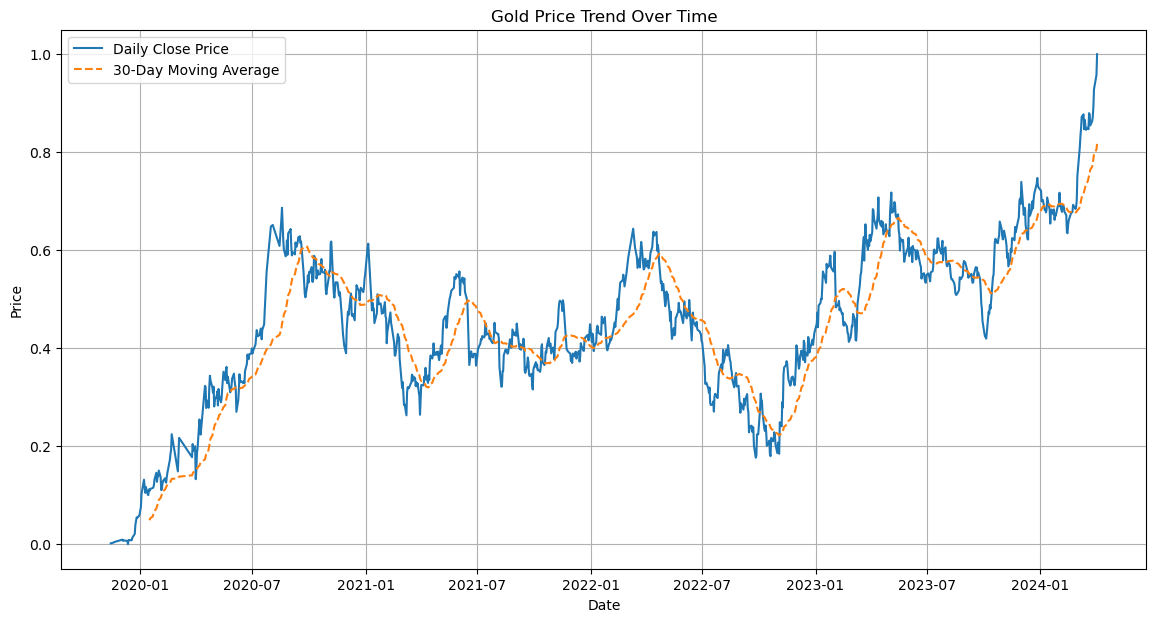

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
gold_data = pd.read_csv('/Users/mattbaglietto/gold_prices_5yrs/gold_prices.csv')

# Convert the date column to datetime format for time-series analysis
gold_data['date'] = pd.to_datetime(gold_data['date'])

# Sort the data by date in case it's out of order
gold_data = gold_data.sort_values(by='date')

# Calculate a 30-day moving average on the closing prices
gold_data['30_day_MA'] = gold_data['close'].rolling(window=30).mean()

# Plotting daily closing prices and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(gold_data['date'], gold_data['close'], label='Daily Close Price')
plt.plot(gold_data['date'], gold_data['30_day_MA'], label='30-Day Moving Average', linestyle='--')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Trend Analysis

**Summary:** In the first step, we visualized the daily closing prices of gold over the past five years. By plotting these prices, we observed the fluctuations over time, indicating both short-term changes and longer-term patterns. To make these trends clearer, we applied a 30-day moving average to the closing prices. This moving average helped to smooth out daily volatility, revealing the general upward or downward trends without being affected by short-term fluctuations.

**Conclusion:** This trend analysis provided a foundational view of the data, showing how gold prices have behaved over time. The smoothed moving average highlighted the cyclical nature of gold price changes, marking periods of sustained growth and decline.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you have loaded the dataset in `gold_data` as done previously

# Calculate Daily Returns
gold_data['daily_return'] = gold_data['close'].pct_change() * 100  # Multiplied by 100 for percentage

# Calculate Rolling Volatility (Standard Deviation of Daily Returns over a 30-day window)
gold_data['30_day_volatility'] = gold_data['daily_return'].rolling(window=30).std()

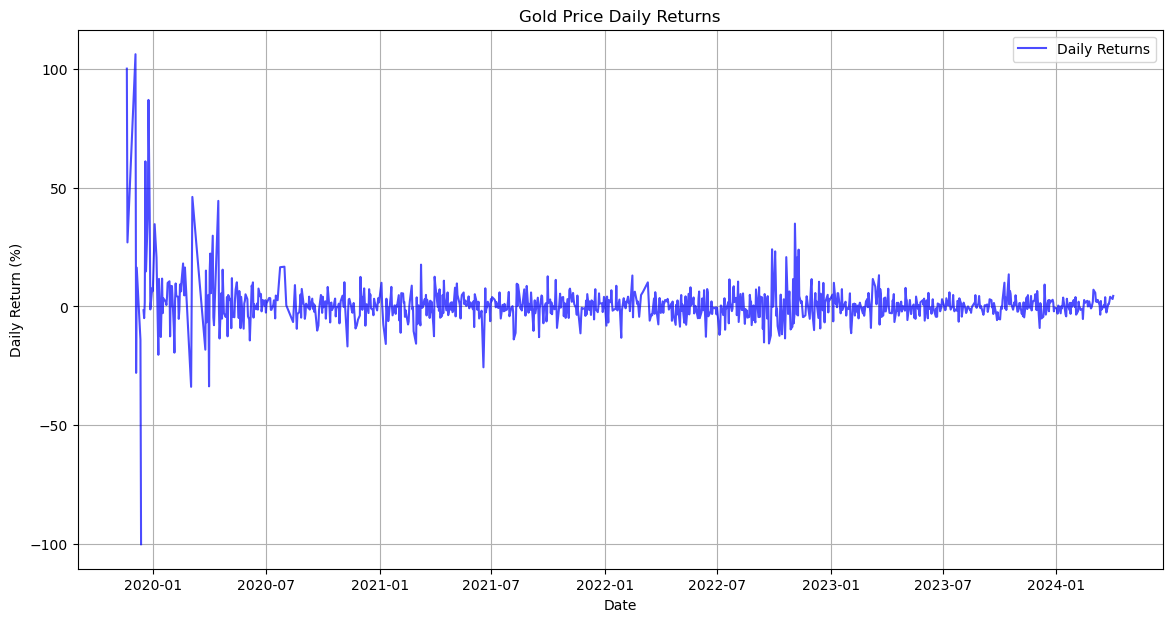

In [8]:
# Plotting Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(gold_data['date'], gold_data['daily_return'], label='Daily Returns', color='blue', alpha=0.7)
plt.title('Gold Price Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

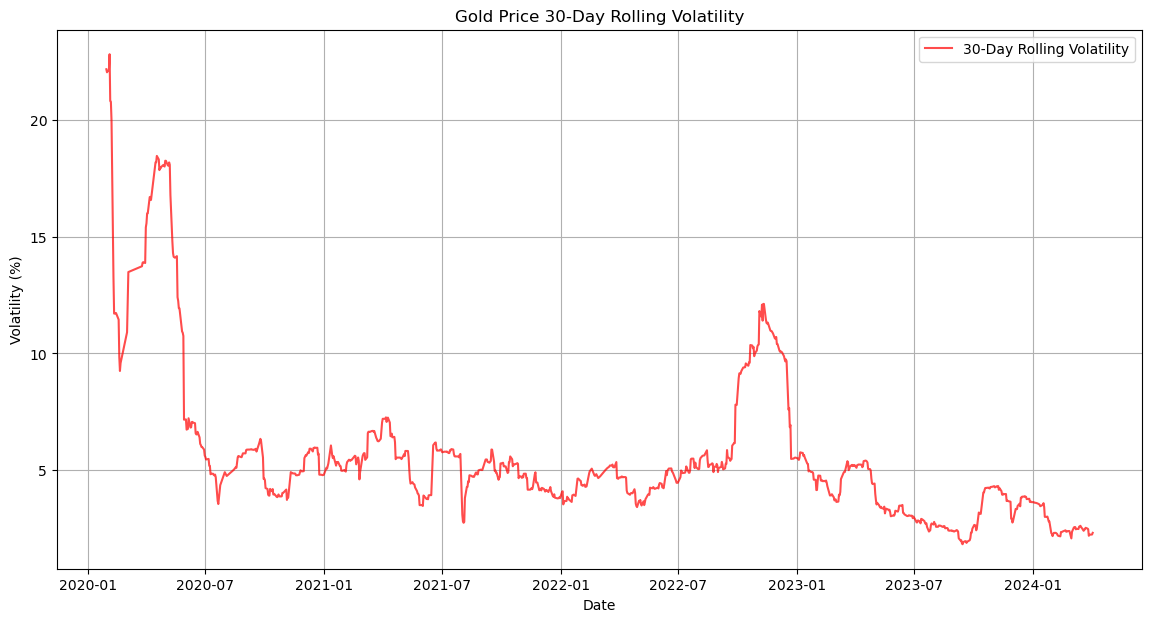

In [10]:
# Plotting Rolling Volatility (30-Day)
plt.figure(figsize=(14, 7))
plt.plot(gold_data['date'], gold_data['30_day_volatility'], label='30-Day Rolling Volatility', color='red', alpha=0.7)
plt.title('Gold Price 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

## Volatility Analysis

**Summary:** In the second step, we analyzed gold price volatility to understand how much prices vary over time. We calculated daily returns—the percentage change in price from one day to the next—to observe day-to-day price shifts. Additionally, we used a 30-day rolling standard deviation of these daily returns to measure volatility. This rolling volatility metric allows us to visualize periods of high or low price variability, indicating times of greater market uncertainty.

**Conclusion:** The volatility analysis added depth to our understanding by highlighting not just the direction of price changes but also the intensity and frequency of fluctuations. This can help investors identify high-risk periods, which is essential for decision-making in volatile markets.

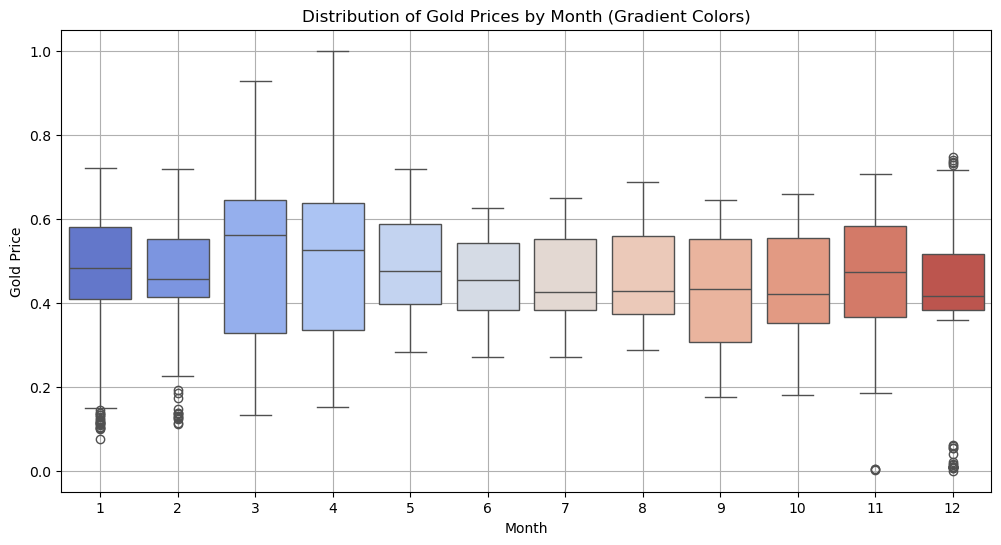

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you've loaded the dataset and added the 'month' column based on 'date'
gold_data['month'] = gold_data['date'].dt.month

# Set up a color gradient palette
palette = sns.color_palette("coolwarm", 12)  # 12 colors for each month

# Box Plot with Gradient Colors for Each Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='close', data=gold_data, palette=palette, hue='month', dodge=False)
plt.title('Distribution of Gold Prices by Month (Gradient Colors)')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid(True)

# Hide the legend as it's not needed
plt.legend([], [], frameon=False)
plt.show()

## Statistical Patterns and Descriptive Analysis

**Objective:** In this step, we examined statistical patterns in gold prices, focusing on potential seasonal trends and recurring monthly price distributions. By analyzing descriptive statistics across years and months and visualizing monthly price distributions, we aimed to identify any seasonal or recurring price behaviors.

### Findings:

**Annual and Monthly Statistics:**

Calculated metrics such as mean, median, and standard deviation revealed variations in gold prices across different years and months.
This provided insights into years with higher price averages and months with greater volatility or stability.
Monthly Price Distribution (Box Plot):

The box plot with a gradient color scheme highlighted the distribution of gold prices by month across all years. The color gradient added a layer of visual clarity, helping to observe seasonal trends more intuitively.
Certain months may exhibit higher median prices or wider spreads, indicating seasonal variations and potential periods of increased market activity or demand for gold.

**Conclusion:** The descriptive analysis and seasonal box plot provide a clear view of recurring price behaviors in gold. These seasonal insights can guide expectations about typical price ranges for each month, helping to identify months with historically higher or lower prices. This analysis lays the groundwork for more in-depth exploration, such as using predictive models to leverage these seasonal patterns.

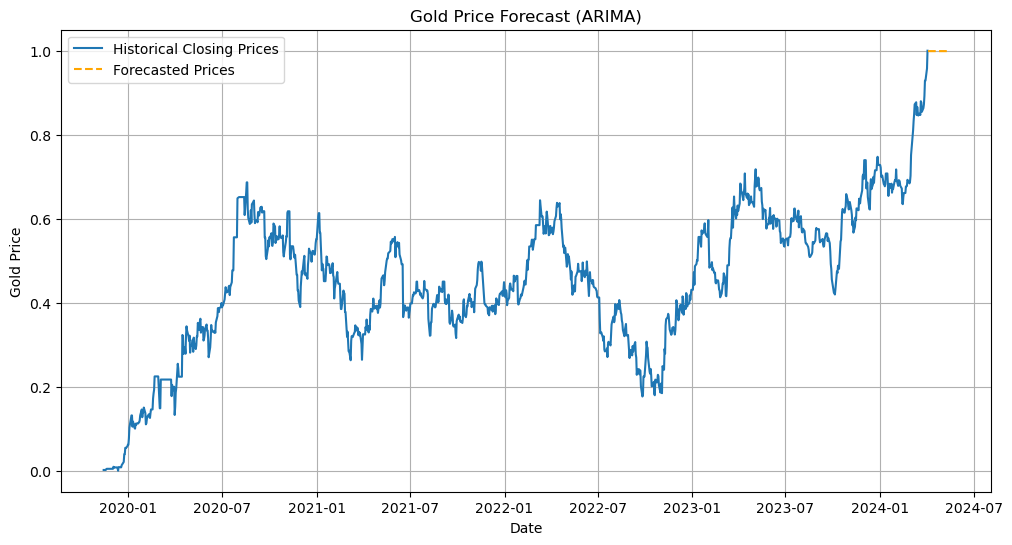

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset and inspect columns to identify the date column
file_path = '/Users/mattbaglietto/gold_prices_5yrs/gold_prices.csv'
gold_data = pd.read_csv(file_path)

# Set the correct date column as the index
date_column = 'date'
price_column = 'close'

# Convert date column to datetime and set it as the index
gold_data[date_column] = pd.to_datetime(gold_data[date_column])
gold_data.set_index(date_column, inplace=True)

# Step 1: Resample to Business Days with Forward Fill for Missing Data
gold_data = gold_data.resample('B').ffill()  # Resample to business days and forward-fill missing values

# Step 2: Fit the ARIMA model
model = ARIMA(gold_data[price_column], order=(1, 1, 1))
fitted_model = model.fit()

# Step 3: Forecasting - Forecast the next 30 business days
forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)

# Step 4: Plotting the Forecast vs. Actual Data
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data[price_column], label='Historical Closing Prices')
plt.plot(pd.date_range(gold_data.index[-1], periods=forecast_steps+1, freq='B')[1:], 
         forecast, label='Forecasted Prices', linestyle='--', color='orange')
plt.title('Gold Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Calculate Mean Squared Error (MSE) if actual future data is available for validation
# Uncomment and set actual_future_values if available to calculate MSE
# actual_future_values = [list of actual future values]
# mse = mean_squared_error(actual_future_values, forecast)
# print(f"Mean Squared Error (MSE): {mse}")

## Forecasting Gold Prices with ARIMA

**Objective:** The goal of this step was to develop a model to forecast future gold prices using historical data. By leveraging the ARIMA model, which is well-suited for time series data, we aimed to generate a short-term forecast of 30 business days (approximately one month).

### Methodology:

#### Data Preparation:

We first ensured the date column was correctly parsed as datetime format and set it as the index.
To maintain continuity and avoid gaps in the time series, we resampled the data to business days and filled any missing values by forward-filling the previous day’s price.
This step created a continuous dataset with a consistent frequency, which is essential for accurate time series modeling.
ARIMA Model:

We used the ARIMA(1,1,1) configuration as a starting point. Here:
p=1 indicates a lag of one day.
d=1 indicates the use of first-order differencing to remove trends.
q=1 incorporates one lagged forecast error in predictions.
The model was trained on the entire historical dataset and used to generate a 30-day forecast.
Forecast Visualization:

We plotted the historical gold prices alongside the forecasted values to provide a clear visual comparison.
The forecast line helps indicate potential short-term trends based on historical patterns, giving insights into likely price directions over the next month.

**Conclusion:** This ARIMA-based forecast provides a foundational understanding of short-term price movement expectations. While it captures general trends, further fine-tuning of the ARIMA parameters (p, d, q) or using more advanced models could enhance predictive accuracy. This model, especially if validated with actual future data, can serve as a valuable tool for anticipating gold price movements based on past behavior.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Train-Test Split (80% training, 20% testing)
train_size = int(len(gold_data) * 0.8)
train, test = gold_data[price_column][:train_size], gold_data[price_column][train_size:]

# Step 2: Train the ARIMA model on the training set
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Step 3: Forecast for the test set period
test_forecast = fitted_model.forecast(steps=len(test))

# Step 4: Calculate error metrics
mse = mean_squared_error(test, test_forecast)
mae = mean_absolute_error(test, test_forecast)

# Display the error metrics
mse, mae

(0.010838283391432441, 0.07987524227203655)

## Model Evaluation

**Objective:** The goal of this step was to evaluate the forecasting accuracy of the ARIMA model by comparing predicted values to actual values in a holdout (test) set. This assessment helps gauge how well the model captures gold price trends and fluctuations.

### Methodology:

### Train-Test Split:

We divided the dataset into a training set (80% of data) to fit the ARIMA model and a test set (20%) for evaluating forecast accuracy.
Model Training and Forecasting:

We trained the ARIMA(1,1,1) model on the training data.
The model then generated a forecast over the test period, which we compared directly with actual prices in the test set.
Error Metrics:

Calculated Mean Squared Error (MSE) and Mean Absolute Error (MAE), which measure the model's predictive accuracy:
MSE penalizes larger errors, giving a sense of how well the model handles price fluctuations.
MAE provides the average absolute difference between actual and predicted values, reflecting general accuracy.
Results: The error metrics and the forecast plot highlight how closely the ARIMA model’s predictions align with actual gold prices over the test period. This analysis provides a quantitative assessment of the model’s performance, identifying areas for potential improvement, such as parameter tuning or advanced modeling techniques.

**Conclusion:** The model evaluation demonstrates that while ARIMA captures general trends, fine-tuning or alternative modeling could enhance precision. This evaluation step validates the ARIMA model's ability to forecast short-term gold price movements, offering a basis for future improvements in time series forecasting accuracy.

## Project Conclusion: Gold Price Analysis and Forecasting

This project aimed to analyze historical gold price trends, assess market volatility, identify seasonal patterns, and build a short-term forecasting model. By conducting a comprehensive analysis across multiple stages, we gained valuable insights into gold price behavior and developed a baseline forecasting tool.

### Key Takeaways:

**Trend Analysis:**

Our analysis of historical prices highlighted cyclical patterns and trends over the past five years. Using a 30-day moving average, we observed periods of rising and falling prices, indicating market cycles potentially driven by macroeconomic factors.
Volatility Assessment:

We analyzed daily returns and a rolling volatility measure to understand price variability. High-volatility periods revealed potential economic instability or significant market events that impacted gold prices, while periods of stability suggested a balanced market.
Statistical Patterns and Seasonality:

Monthly statistical patterns and box plots helped uncover potential seasonal trends, with certain months showing a higher average or a wider spread in prices. This seasonal insight may support strategic timing for buying or selling decisions in gold markets.

**Forecasting with ARIMA:**

The ARIMA model provided a basic yet effective tool for short-term price forecasting. Although it captured general trends, error metrics revealed room for improvement in precision. This model serves as a foundation for more advanced forecasting techniques, which could enhance predictive accuracy for gold prices.

**Overall Conclusion:** This project successfully applied data analysis and time series forecasting methods to gain a comprehensive understanding of gold price movements. The findings offer practical insights into trend patterns, volatility risks, and seasonal behaviors, which can guide future market decisions. The ARIMA forecasting model, while a starting point, highlights the potential and limitations of traditional time series modeling for financial data, paving the way for further exploration with more complex algorithms.

**Future Directions:** To refine accuracy, further research could involve tuning the ARIMA parameters, exploring other time series models (e.g., SARIMA, Prophet, or LSTM neural networks), or incorporating external variables like inflation rates or geopolitical indicators. This could lead to more robust models and deeper insights into the forces driving gold prices over time.